## Import

In [2]:
import os
from glob import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import dlib

## Contoh Penggunaan Glob

In [3]:
data_folder = os.path.join(os.getcwd(), 'data', '*wav')
wav_files = glob(data_folder)
print(wav_files)
print(f"Found {len(wav_files)} wav files")

[]
Found 0 wav files


---

## Memutar Video

In [4]:
video_path = os.path.join(os.getcwd(), 'attachment', 'sample-renamed.mp4')

if not os.path.exists(video_path):
    print("Video file not found")
    exit(1)

In [5]:
cap = cv2.VideoCapture(video_path)

vid_np = []
i = 0

while i < 150:
    # membaca frame
    ret, frame = cap.read()
    
    # jika frame sudah habis, maka break (keluar dari loop)
    if not ret:
        break
    
    # pindahin frame ke `vid_np`
    vid_np.append(frame)
    
    # nampilin frame
    # cv2.imshow('Video', frame) # saya comment karena error di MacOS baru
    
    # jika tombol `q` ditekan, maka video akan berhenti
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
    i += 1

cap.release()
cv2.destroyAllWindows()

vid_np = np.array(vid_np)

In [6]:
print(f"Shape dari `vid_np` adalah {vid_np.shape}")

Shape dari `vid_np` adalah (150, 1080, 1920, 3)


---

## Nampilin salah satu frame

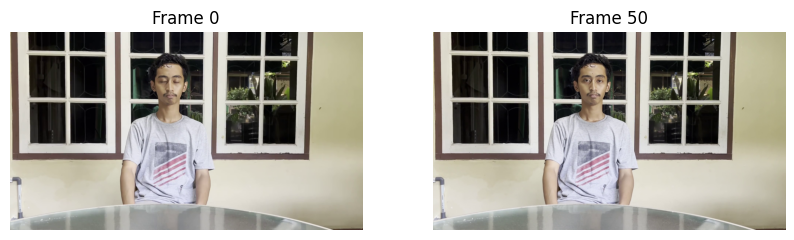

In [7]:
img_frame0 = vid_np[0]
img_frame1 = vid_np[50]

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_frame0, cv2.COLOR_BGR2RGB))
plt.title('Frame 0')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_frame1, cv2.COLOR_BGR2RGB))
plt.title('Frame 50')
plt.axis('off')

plt.show()

In [8]:
new_array = np.array([img_frame0 if i % 2 == 0 else img_frame1 for i in range(301)])
print(len(new_array))

301


In [9]:
output_path = os.path.join(os.getcwd(), 'data', 'toby-eye.avi')
height, width, layers = new_array[0].shape
print(f"Height: {height}, Width: {width}, Layers: {layers}")
size = (width, height)

# membuat file video
out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'DIVX'), 5, size)

Height: 1080, Width: 1920, Layers: 3


In [10]:
# diisi berdasarkan `new_array`
for frame in new_array:
    out.write(frame)
out.release()
print(f"Video saved to {output_path}")

Video saved to d:\Stuff That I Need to Do\IF4021 - Multimedia Technology\material\week9\data\toby-eye.avi


---

## Mendeteksi Wajah dengan DLIB

Jumlah wajah yang terdeteksi: 1
Koordinat wajah: rectangles[[(778, 222) (964, 407)]]


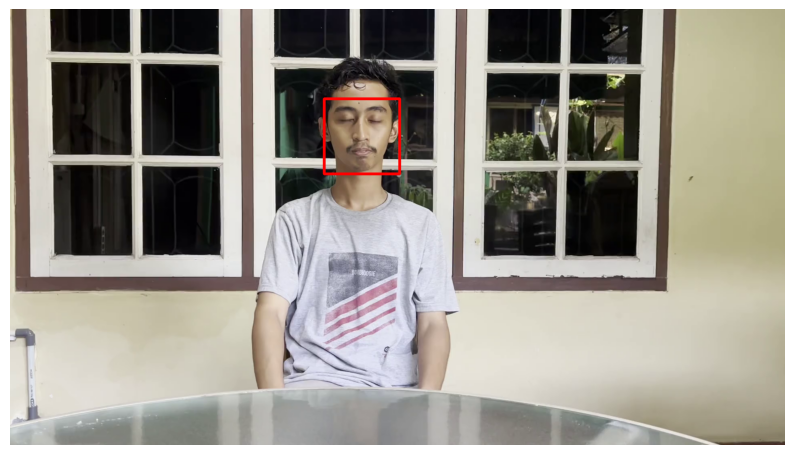

In [11]:
img_frame0 = vid_np[0].copy()
img_frame0 = cv2.cvtColor(img_frame0, cv2.COLOR_BGR2RGB)
img_frame0_gray = cv2.cvtColor(img_frame0, cv2.COLOR_RGB2GRAY)

detector = dlib.get_frontal_face_detector()
faces = detector(img_frame0_gray, 1)
print(f"Jumlah wajah yang terdeteksi: {len(faces)}")
print(f"Koordinat wajah: {faces}")

# gunakan cv2 rectangle. (format: x1, y1, x2, y2)
# format yang terdeteksi dari dlib adalah xywh (x, y, w, h)

x1 = faces[0].left()
y1 = faces[0].top()
w = faces[0].width()
h = faces[0].height()

x2 = x1 + w
y2 = y1 + h

cv2.rectangle(img_frame0, (x1, y1), (x2, y2), (255, 0, 0), 5)

plt.figure(figsize=(10, 10))
plt.imshow(img_frame0)
plt.axis('off')
plt.show()


---
## Melakukan deteksi wajah di video

In [12]:
cap = cv2.VideoCapture(video_path)

vid_np = []
i = 0

detector = dlib.get_frontal_face_detector()
output_path = os.path.join(os.getcwd(), 'data', 'toby-facedet-vid.avi')
height, width, layers = new_array[0].shape
print(f"Height: {height}, Width: {width}, Layers: {layers}")
size = (width, height)

# membuat file video
out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'DIVX'), 30, size)

while i < 150:
    # membaca frame
    ret, frame = cap.read()
    
    # jika frame sudah habis, maka break (keluar dari loop)
    if not ret:
        break
    
    # convert frame jadi grayscale
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # deteksi wajah
    faces = detector(frame_gray, 1)
    x1, y1, w, h = faces[0].left(), faces[0].top(), faces[0].width(), faces[0].height()
    x2, y2 = x1 + w, y1 + h
    
    # gambar rectangle
    cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 5)
    
    # save frame ke file video
    out.write(frame)
    
    # increement i
    i += 1

cap.release()
cv2.destroyAllWindows()
out.release()


Height: 1080, Width: 1920, Layers: 3


KeyboardInterrupt: 